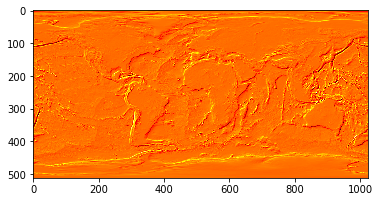

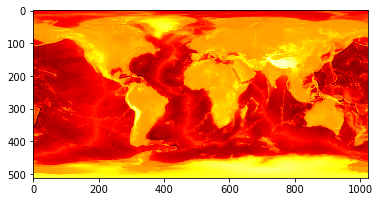

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#########################################################################
#--Programa que calcula a intensidade de irradiação solar sobre um------#
#--terreno dado ângulo de incidência. Em especial, com esse programa----#
#--podemos simular uma imagem 3D de um mapa mundi iluminado com---------#
#--ângulo de 45 graus. O arquivo de texto utilizado #contém a altura----#
#--para cada ponto do mapa mundi, separados por uma distância de 30km---#
#########################################################################

def Grad(file, h):
    f = np.asanyarray(file)
    Nx, Ny = np.shape(f)[0], np.shape(f)[1]
    
    dx = np.zeros([Nx,Ny], float)
    dy = dx.copy()
    
    for i in range(Nx):
        for j in range(Ny):
            if i == 0:
                dy[i,j] = (f[i+1,j] - f[i,j])/h            
            
            if i == Nx - 1:
                dy[i,j] = (f[i,j] - f[i-1,j])/h             
            
            else:
                dy[i,j] = (f[i+1,j] - f[i-1,j])/(2*h)            
    
    for i in range(Nx):
        for j in range(Ny):
            if j == 0:
                dx[i,j] = (f[i,j+1] - f[i,j])/h
            if j == Ny - 1:
                dx[i,j] = (f[i,j] - f[i,j-1])/h
            else:
                dx[i,j] = (f[i,j+1] - f[i,j-1])/(2*h)            
           
    return dx,dy

H     = np.loadtxt('altitude.txt')
h     = 3000
theta = (45/180)*np.pi
dx,dy = Grad(H, h)

I = (np.cos(theta)*dx + np.sin(theta)*dy)/(dx**2 + dy**2 + 1)**0.5

plt.imshow(I, cmap = 'hot')
plt.savefig('im_5_23a1',dpi = 300)
plt.show()
plt.imshow(H, cmap = 'hot')
plt.savefig('im_5_23a2',dpi = 300)
plt.show()